In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [46]:
pip install ucimlrepo

In [47]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [48]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
feature_names = X.columns.to_numpy()

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


df = pd.concat([X, y], axis=1)

scaler = StandardScaler()
xscaled = scaler.fit_transform(X)
xscaledDf = pd.DataFrame(xscaled, columns=X.columns)
df_standardized = pd.concat([xscaledDf, y], axis=1)
#encoding
X = xscaled
Y = y

In [49]:
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.2, random_state=42)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(X_train, y_train)
dt_pred = decisionTree.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
dt_precision = precision_score(y_test, dt_pred,pos_label='M')
print(f"Decision Tree Precision: {dt_precision:.2f}")
dt_recall =  recall_score(y_test, dt_pred,pos_label='M')
print(f"Decision Tree Recall: {dt_recall:.2f}")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_precision = precision_score(y_test, rf_pred,pos_label='M')
print(f"Random Forest Precision: {rf_precision :.2f}")
rf_recall = recall_score(y_test, rf_pred,pos_label='M')
print(f"Random Forest Recall: {rf_recall :.2f}")

Decision Tree Accuracy: 0.95
Decision Tree Precision: 0.93
Decision Tree Recall: 0.93
Random Forest Accuracy: 0.96
Random Forest Precision: 0.98
Random Forest Recall: 0.93


In [50]:
rf_accuracies = []

nEstimators = [50, 100, 200]
maxDepth = [None, 5, 10, 20]
minSplit = [2, 5, 10]
maxFeatures = ['sqrt', 'log2', 0.5]

best_acc = 0
best_rf = None
best_params = None

for n in nEstimators:
    for depth in maxDepth:
        for split in minSplit:
            for feat in maxFeatures:
                rf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    max_features=feat,
                    random_state=42
                )
                rf.fit(X_train, y_train)
                pred = rf.predict(X_test)
                acc = accuracy_score(y_test, pred)
                rf_accuracies.append(acc)

                if acc > best_acc:
                    best_acc = acc
                    best_rf = rf
                    best_params = {
                        'n_estimators': n,
                        'max_depth': depth,
                        'min_samples_split': split,
                        'max_features': feat,
                        'Accuracy': acc
                    }


feature_importance = best_rf.feature_importances_
top_features = np.argsort(feature_importance)[-10:]


xtraintop = X_train[:, top_features]
xtesttop = X_test[:, top_features]

topten = RandomForestClassifier(random_state=42)
topten.fit(xtraintop, y_train)
toptenpred = topten.predict(xtesttop)
toptenacc = accuracy_score(y_test, toptenpred)
rf_accuracies.append(toptenacc)


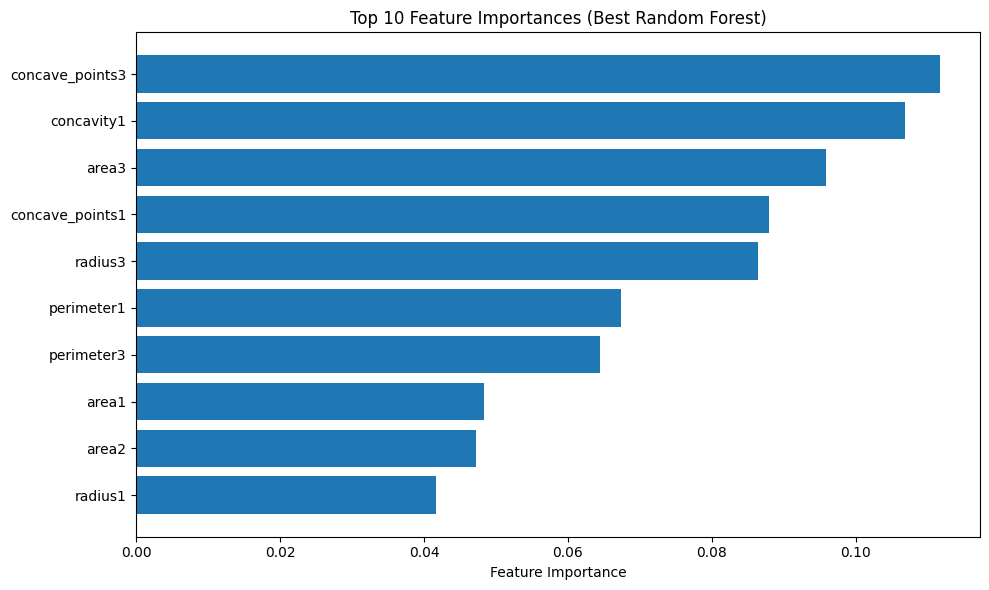

In [51]:
#top 10 feature importances
feature_importance = best_rf.feature_importances_

top_features = np.argsort(feature_importance)[-10:]

top_feature_names = feature_names[top_features]
top_feature_values = feature_importance[top_features]


sorted_idx = np.argsort(top_feature_values)
top_feature_names = top_feature_names[sorted_idx]
top_feature_values = top_feature_values[sorted_idx]


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.barh(top_feature_names, top_feature_values)

plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances (Best Random Forest)")

plt.tight_layout()
plt.show()


<Figure size 600x600 with 0 Axes>

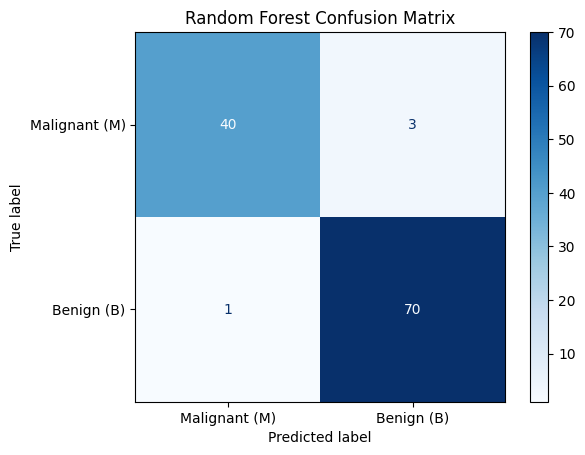

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred, labels=['M','B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Malignant (M)', 'Benign (B)'])

plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

tuned_pred = best_rf.predict(X_test)

tuned_accuracy = accuracy_score(y_test, tuned_pred)
tuned_precision = precision_score(y_test, tuned_pred, pos_label='M')
tuned_recall = recall_score(y_test, tuned_pred, pos_label='M')

print(f"Tuned Random Forest Accuracy:  {tuned_accuracy:.2f}")
print(f"Tuned Random Forest Precision: {tuned_precision:.2f}")
print(f"Tuned Random Forest Recall:    {tuned_recall:.2f}")


Tuned Random Forest Accuracy:  0.97
Tuned Random Forest Precision: 0.98
Tuned Random Forest Recall:    0.95


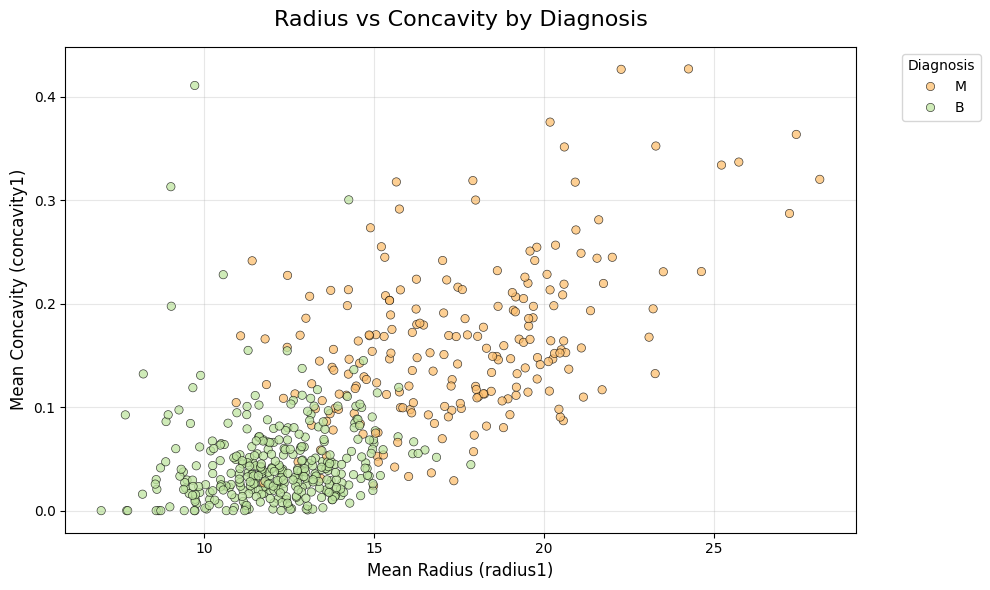

In [44]:
#radius vs concavity
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="radius1",
    y="concavity1",
    hue="Diagnosis",
    palette="Spectral",
    alpha=0.75,
    edgecolor="black")

plt.title("Radius vs Concavity by Diagnosis", fontsize=16, pad=15)
plt.xlabel("Mean Radius (radius1)", fontsize=12)
plt.ylabel("Mean Concavity (concavity1)", fontsize=12)
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

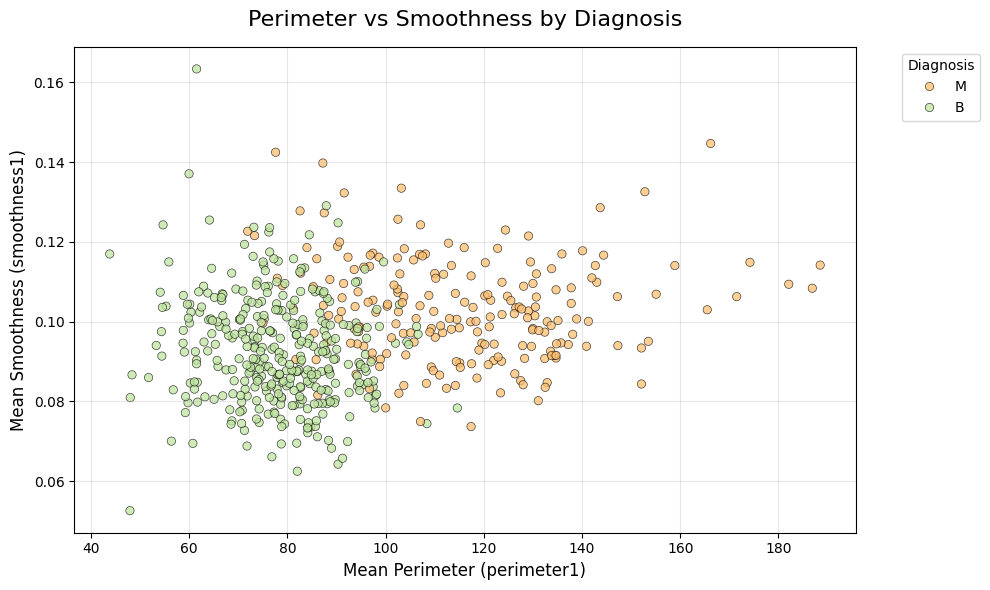

In [20]:
#perimeter vs smoothness
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="perimeter1",
    y="smoothness1",
    hue="Diagnosis",
    palette="Spectral",
    alpha=0.75,
    edgecolor="black")

plt.title("Perimeter vs Smoothness by Diagnosis", fontsize=16, pad=15)
plt.xlabel("Mean Perimeter (perimeter1)", fontsize=12)
plt.ylabel("Mean Smoothness (smoothness1)", fontsize=12)
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

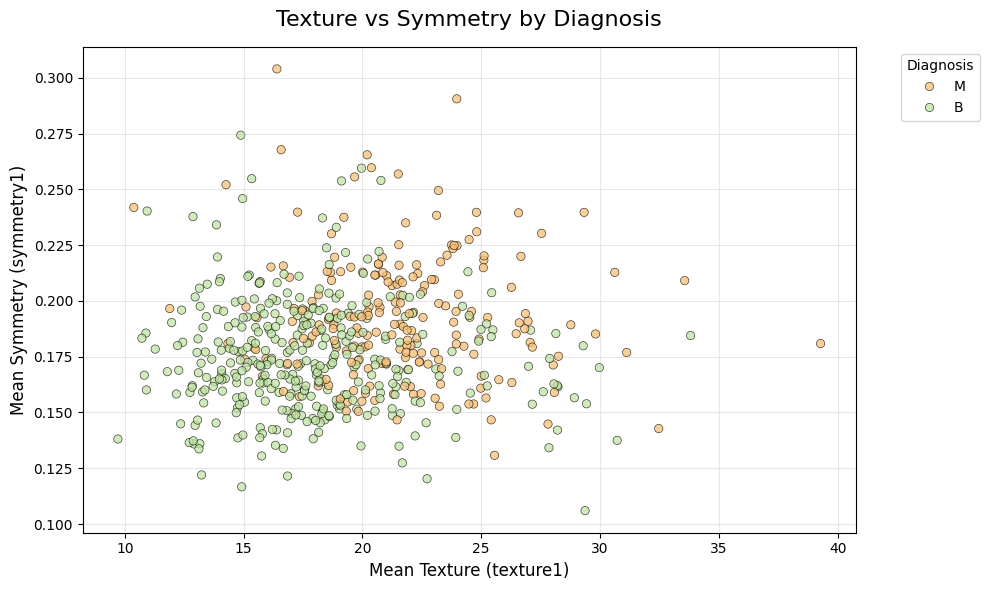

In [21]:
#texture vs symmetry
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="texture1",
    y="symmetry1",
    hue="Diagnosis",
    palette="Spectral",
    alpha=0.75,
    edgecolor="black")

plt.title("Texture vs Symmetry by Diagnosis", fontsize=16, pad=15)
plt.xlabel("Mean Texture (texture1)", fontsize=12)
plt.ylabel("Mean Symmetry (symmetry1)", fontsize=12)
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

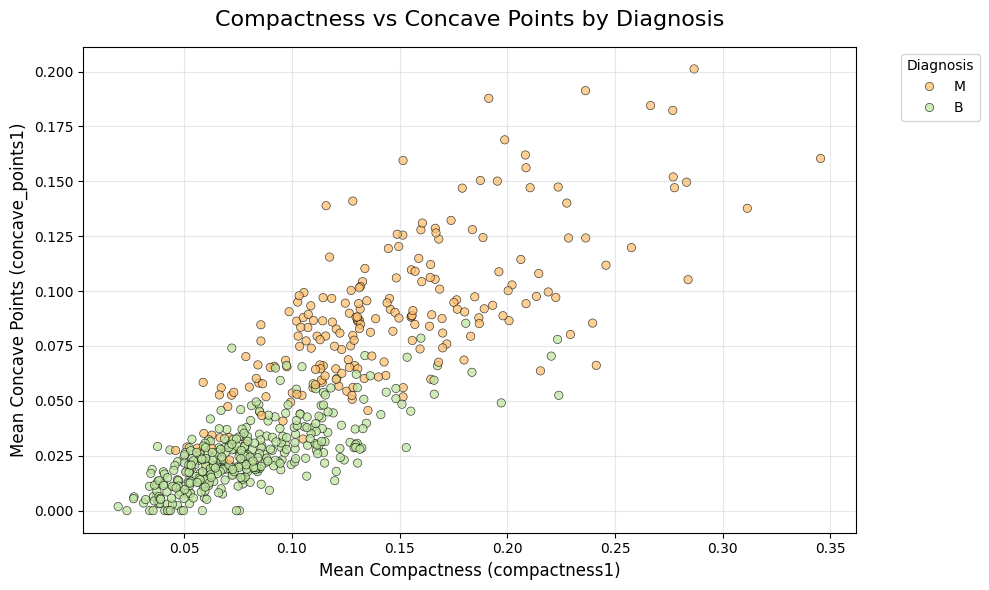

In [22]:
#compactness vs concave_points
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="compactness1",
    y="concave_points1",
    hue="Diagnosis",
    palette="Spectral",
    alpha=0.75,
    edgecolor="black")

plt.title("Compactness vs Concave Points by Diagnosis", fontsize=16, pad=15)
plt.xlabel("Mean Compactness (compactness1)", fontsize=12)
plt.ylabel("Mean Concave Points (concave_points1)", fontsize=12)
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()